In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb

In [2]:
Data = pd.read_csv('D:/Class work/Fall 2021/DAEN 690/Assignments/combPeopledfCheck750000.csv')

C:\Users\amarp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Data = Data.sample(frac = 1)
print(Data)

        ApplicantID [I130]PeopleNamePetitioner [I130A]PeopleNameBeneficiary  \
737471      1337471              Jeffrey Brown                 Nicole Young   
703145      1303145             Barbara Vargas              Sarah Mccormick   
262949      2512949             Dr. Shane Cook                  Lisa Robles   
36094       2036094                Eric Jordan               Sheila Johnson   
569442      1019442                 Corey Hill               Shawn Lawrence   
...             ...                        ...                          ...   
517437      3017437               Sheila Allen               Katherine Diaz   
338304      2638304      Dr. Robert Walker PhD                Charles Owens   
104497      2204497            Debbie Buchanan               David Sullivan   
164978      2314978                Peter Reyes                   Amy Wilson   
151709      2301709                David Hicks              Christine Hayes   

       [I130]DOBPetitioner [I130]MailingStateFiling

In [4]:
for col_name in Data.columns: 
    print(col_name)

ApplicantID
[I130]PeopleNamePetitioner
[I130A]PeopleNameBeneficiary
[I130]DOBPetitioner
[I130]MailingStateFilingPetitioner
[I130A]CountryOfBirthBeneficiary
[I130A]GenderBeneficiary
[I130]PassportExpiryBeneficiary
[I130]PetitionerEthnicity
[I130]PetitionerRace
[I130]PetitionerCitizenStatus
[I864]RegularIncome
[I864]SupplementalIncome
[I130]StayingTogetherStatus
[I130]CurrentMaritalStatus
[I864]FederalTaxFiled
[I485-130]SameEmployer
[I130]ImmigrationProceeding
[I485]CriminalityProvedConvicted
[I130]PreviousPetitionFiledPetitionerSameSpouse
[I130]PreviousPetitionFiledDifferentSpouse
[I130A]BeneficiaryInUS
[I130-MarriageCertificate]SamePreparorNoterMinister
[I130A]DOBBeneficiary
[I130]GenderPetitioner
[CALCULATED]AgeGapDays
[CALCULATED]AgePetitioner
[CALCULATED]AgeBeneficiary
[CALCULATED]AgeGapYears
[I130]PreviousMaritalStatusPetitioner
[I130]PreviousMaritalStatusBeneficiary
[I130]PreviousLegallySeperatedCountryPetitioner
[I130]NumberOfMarriagesPetitioner
[I130]NumberOfMarriagesBeneficiary

In [5]:
Data['[I130]PreviousFiledPetitionerSameSpouseRejectionCondition'].value_counts()

Minor Reasons       15053
Moderate Reasons    10425
Major Reasons        4561
Name: [I130]PreviousFiledPetitionerSameSpouseRejectionCondition, dtype: int64

In [6]:
Data.dtypes

ApplicantID                                                       int64
[I130]PeopleNamePetitioner                                       object
[I130A]PeopleNameBeneficiary                                     object
[I130]DOBPetitioner                                              object
[I130]MailingStateFilingPetitioner                               object
[I130A]CountryOfBirthBeneficiary                                 object
[I130A]GenderBeneficiary                                         object
[I130]PassportExpiryBeneficiary                                  object
[I130]PetitionerEthnicity                                        object
[I130]PetitionerRace                                             object
[I130]PetitionerCitizenStatus                                    object
[I864]RegularIncome                                               int64
[I864]SupplementalIncome                                          int64
[I130]StayingTogetherStatus                                     

In [7]:
def federalpovertyline(x,y):
    if x >= y:
        return 'Yes'
    else:
        return 'No'
       

In [8]:
Data['[CALCULATED]IncomeAboveFederalPovertyLine']= Data.apply(lambda x: federalpovertyline(x["[CALCULATED]TotalIncome"], x["[CALCULATED]FederalPovertyLineValue"]), axis=1)

In [9]:
def TotalYearsFromLastMarriageCategoricalFn(x):
    if x >= 2:
        a="2 or More Years"
    elif x < 2:
        a="Less than 2 Years"
    else:
        a="Green"
    
    return a

In [10]:
Data['[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical'] =  Data['[CALCULATED]TotalYearsFromLastMarriagePetitioner'].apply(lambda x: TotalYearsFromLastMarriageCategoricalFn(x))

In [11]:
Data['[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical'] =  Data['[CALCULATED]TotalYearsFromLastMarriageBeneficiary'].apply(lambda x: TotalYearsFromLastMarriageCategoricalFn(x))

In [12]:
Data['[CALCULATED]IncomeAboveFederalPovertyLine'].value_counts()

Yes    707708
No      42292
Name: [CALCULATED]IncomeAboveFederalPovertyLine, dtype: int64

In [13]:
def Fraud(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [14]:
Data['[Calculated]FraudLikelihoodnumeric']= Data['[Calculated]FraudLikelihood'].apply(lambda x: Fraud(x))

In [15]:
Data['[Calculated]FraudLikelihoodnumeric'].value_counts()

0    434518
1    315482
Name: [Calculated]FraudLikelihoodnumeric, dtype: int64

In [16]:
Data['[I130]PreviousFiledPetitionerSameSpouseRejectionCondition'].fillna("Green",inplace = True)

In [ ]:
# Data['[I130]PreviousFiledPetitionerSameSpouseRejectionCondition'] =  Data['[I130]PreviousFiledPetitionerSameSpouseRejectionCondition'].apply(lambda x: PreviousFiledPetitionerRejectionConditionFn(x))

In [ ]:
# Data['[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition'] =  Data['[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition'].apply(lambda x: PreviousFiledPetitionerRejectionConditionFn(x))

In [17]:
Data['[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition'].fillna("Green",inplace = True)

In [18]:
Data['[I130]PreviousFiledPetitionerSameSpouseRejectionCondition'].value_counts()

Green               719961
Minor Reasons        15053
Moderate Reasons     10425
Major Reasons         4561
Name: [I130]PreviousFiledPetitionerSameSpouseRejectionCondition, dtype: int64

In [19]:
Data['[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition'].value_counts()

Green               710039
Minor Reasons        20001
Moderate Reasons     13947
Major Reasons         6013
Name: [I130]PreviousPetitionFiledDifferentSpouseRejectionCondition, dtype: int64

In [20]:
def CriminalityProvedConvictedTypeFn(x):
    if x == "Major Reasons" or x == "Minor Reasons":
        a = x
    else:
        a = "Green"
        
    return a

In [21]:
Data['[I485]CriminalityProvedConvictedTypeN'] =  Data['[I485]CriminalityProvedConvictedType'].apply(lambda x: CriminalityProvedConvictedTypeFn(x))

In [22]:
def Agegapfn(x):
    if x >= 15:
        return "red"
    elif x<15 and x>9:
        return "Yellow"
    else:
        return "Green"
        
    

In [23]:
Data['[CALCULATED]AgeGapYears_Cat'] =  Data['[CALCULATED]AgeGapYears'].apply(lambda x: Agegapfn(x))

In [24]:
Data['[CALCULATED]AgeGapYears_Cat'].value_counts() 

Green     635349
red        79284
Yellow     35367
Name: [CALCULATED]AgeGapYears_Cat, dtype: int64

In [25]:
Data['[I485]CriminalityProvedConvictedTypeN'].value_counts()

Green            714494
Minor Reasons     26540
Major Reasons      8966
Name: [I485]CriminalityProvedConvictedTypeN, dtype: int64

In [104]:
Y = Data[['[Calculated]FraudLikelihoodnumeric']]

In [27]:
print(Y.head())

        [Calculated]FraudLikelihoodnumeric
737471                                   1
703145                                   1
262949                                   0
36094                                    0
569442                                   1


In [28]:
def RedGreenYellow(x):
    if x == 'Green':
        return 0
    elif x == "Yellow":
        return 1
    else:
        return 2

In [29]:
Data['[Calculated]FlagType'] = Data['[Calculated]FlagType'].apply(lambda x: RedGreenYellow(x))

In [30]:
Data['[Calculated]FlagType'].value_counts()

0    434518
2    222642
1     92840
Name: [Calculated]FlagType, dtype: int64

In [31]:
X = Data[['[I130]StayingTogetherStatus','[I130]CurrentMaritalStatus','[I485-130]SameEmployer','[I130]ImmigrationProceeding',
         '[I130A]BeneficiaryInUS','[I130-MarriageCertificate]SamePreparorNoterMinister','[CALCULATED]AgeGapYears_Cat','[I130]NumberOfMarriagesPetitioner',
         '[I130]NumberOfMarriagesBeneficiary','[I485]CriminalityProvedConvictedTypeN','[I130]PreviousFiledPetitionerSameSpouseRejectionCondition',
         '[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition','[CALCULATED]IncomeAboveFederalPovertyLine','[I864]FederalTaxFiledYears',
         '[CALCULATED]LengthOfMarriage','[CALCULATED]DiffEntryDateAndMarriageDate','[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical',
         '[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical']]

In [32]:
dummylist = ['[I130]StayingTogetherStatus','[I130]CurrentMaritalStatus','[I485-130]SameEmployer','[I130]ImmigrationProceeding',
            '[I130A]BeneficiaryInUS','[I130-MarriageCertificate]SamePreparorNoterMinister','[I485]CriminalityProvedConvictedTypeN',
            '[I130]PreviousFiledPetitionerSameSpouseRejectionCondition','[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition',
            '[CALCULATED]IncomeAboveFederalPovertyLine','[I864]FederalTaxFiledYears','[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical',
            '[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical','[CALCULATED]AgeGapYears_Cat']

In [33]:
def dummy(Data,dummylist):
    for X in dummylist:
        dummies = pd.get_dummies(Data[X], prefix=X, dummy_na=False)
        Data = Data.drop(X,1)
        Data = pd.concat([Data, dummies],axis = 1)
    return Data 

In [34]:
X = dummy(X , dummylist)


In [35]:
for col_name in X.columns: 
    print(col_name)

[I130]NumberOfMarriagesPetitioner
[I130]NumberOfMarriagesBeneficiary
[CALCULATED]LengthOfMarriage
[CALCULATED]DiffEntryDateAndMarriageDate
[I130]StayingTogetherStatus_Different States
[I130]StayingTogetherStatus_Same House
[I130]StayingTogetherStatus_Same State - Different Address
[I130]CurrentMaritalStatus_Married
[I130]CurrentMaritalStatus_Separated
[I485-130]SameEmployer_No
[I485-130]SameEmployer_Yes
[I130]ImmigrationProceeding_No
[I130]ImmigrationProceeding_Yes
[I130A]BeneficiaryInUS_No
[I130A]BeneficiaryInUS_Yes
[I130-MarriageCertificate]SamePreparorNoterMinister_No
[I130-MarriageCertificate]SamePreparorNoterMinister_Yes
[I485]CriminalityProvedConvictedTypeN_Green
[I485]CriminalityProvedConvictedTypeN_Major Reasons
[I485]CriminalityProvedConvictedTypeN_Minor Reasons
[I130]PreviousFiledPetitionerSameSpouseRejectionCondition_Green
[I130]PreviousFiledPetitionerSameSpouseRejectionCondition_Major Reasons
[I130]PreviousFiledPetitionerSameSpouseRejectionCondition_Minor Reasons
[I130]Prev

In [36]:
datacorr = X.corr().abs()

In [37]:
# Select upper triangle of correlation matrix
upper = datacorr.where(np.triu(np.ones(datacorr.shape), k=1).astype(np.bool))

<ipython-input-37-1b9e59725ce0>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = datacorr.where(np.triu(np.ones(datacorr.shape), k=1).astype(np.bool))


In [100]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [101]:
X.drop(X[to_drop], axis=1)

,[I130]NumberOfMarriagesPetitioner,[I130]NumberOfMarriagesBeneficiary,[CALCULATED]LengthOfMarriage,[CALCULATED]DiffEntryDateAndMarriageDate,[I130]StayingTogetherStatus_Different States,[I130]StayingTogetherStatus_Same House,[I130]StayingTogetherStatus_Same State - Different Address,[I130]CurrentMaritalStatus_Married,[I485-130]SameEmployer_No,[I130]ImmigrationProceeding_No,...,[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition_Green,[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition_Major Reasons,[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition_Minor Reasons,[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition_Moderate Reasons,[CALCULATED]IncomeAboveFederalPovertyLine_No,[I864]FederalTaxFiledYears_3 or 3+ years,[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical_2 or More Years,[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical_2 or More Years,[CALCULATED]AgeGapYears_Cat_Green,[CALCULATED]AgeGapYears_Cat_Yellow
737471,1,0,0,2787,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
703145,0,0,3,2436,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
262949,0,0,6,888,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
36094,0,0,6,2145,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
569442,3,0,3,3427,0,1,0,1,1,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517437,0,0,6,1100,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
338304,0,0,4,2867,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
104497,0,0,2,2523,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
164978,0,0,6,1747,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0


<AxesSubplot:>

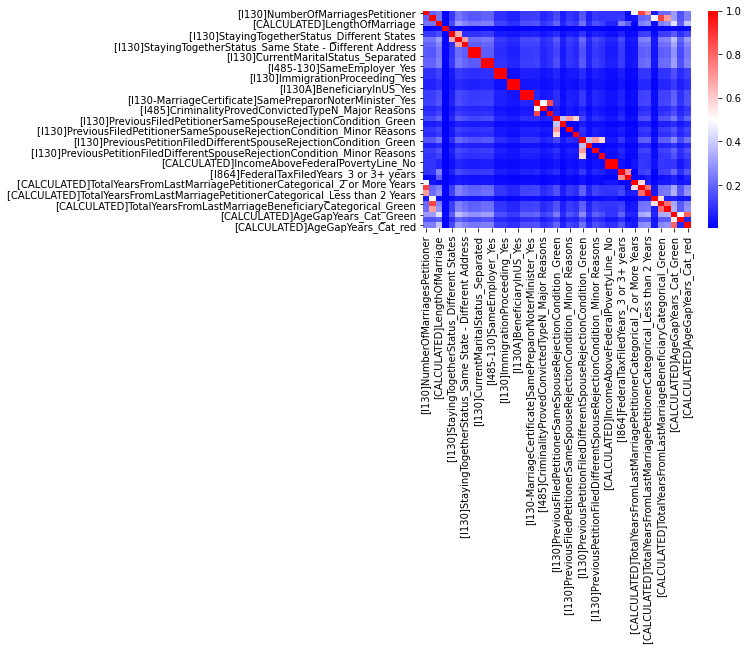

In [40]:
sb.heatmap(datacorr, cmap = 'bwr')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.decomposition import PCA
import sklearn.decomposition as skdc
import sklearn.pipeline as skpl
from sklearn import decomposition
import matplotlib.pyplot as plt

In [ ]:
normalised_data = (X - X.mean())/X.std()

In [ ]:
X = normalised_data

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=42)

In [106]:
y_train['[Calculated]FraudLikelihoodnumeric'].value_counts()

0    347493
1    252507
Name: [Calculated]FraudLikelihoodnumeric, dtype: int64

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [108]:
logit_model = LogisticRegression().fit(X_train, y_train)

C:\Users\amarp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\amarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
# Get prediction probabilities for the test set.
y_predict_proba = logit_model.predict_proba(X_test)

In [110]:
y_predict_proba

array([[3.11839443e-12, 1.00000000e+00],
       [9.17268311e-01, 8.27316889e-02],
       [2.66369149e-11, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [9.63688097e-01, 3.63119029e-02],
       [9.97171375e-01, 2.82862482e-03]])

In [111]:
cutoff = 0.5
y_predict = [int(proba[1] > cutoff) for proba in y_predict_proba]

In [112]:
y_predict

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,


In [113]:
M = confusion_matrix(y_test, y_predict)
M

array([[86964,    61],
       [ 2365, 60610]], dtype=int64)

In [114]:
y_test

,[Calculated]FraudLikelihoodnumeric
567316,1
481764,0
450584,1
472862,0
117008,0
...,...
214602,0
3434,0
709346,1
534940,0


In [115]:
n_samples = len(y_test)
print(M)
print('Accuracy:  %.2f' % ((M[0][0] + M[1][1]) / n_samples))
print('Precision: %.2f' % (M[1][1] / (M[0][1] + M[1][1])))
print('Recall:    %.2f' % (M[1][1] / (M[1][0] + M[1][1])))

[[86964    61]
 [ 2365 60610]]
Accuracy:  0.98
Precision: 1.00
Recall:    0.96


In [ ]:
pca_model = decomposition.PCA(n_components= 10)

In [ ]:
pca_model.fit(X)

In [ ]:
pca_data = pd.DataFrame(pca_model.transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_data,Y, train_size=0.8,test_size=0.2,random_state=42)

In [ ]:
logit_model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_predict_proba = logit_model.predict_proba(X_test)

In [ ]:
cutoff = 0.3
y_predict = [int(proba[1] > cutoff) for proba in y_predict_proba]

In [ ]:
M = confusion_matrix(y_test, y_predict)
M

In [ ]:
n_samples = len(y_test)
print(M)
print('Accuracy:  %.2f' % ((M[0][0] + M[1][1]) / n_samples))
print('Precision: %.2f' % (M[1][1] / (M[0][1] + M[1][1])))
print('Recall:    %.2f' % (M[1][1] / (M[1][0] + M[1][1])))

In [ ]:
# pca = skdc.PCA()

In [ ]:
# pcafit = pca.fit_transform(X,Y)

In [ ]:
# var_explained = pca.explained_variance_ratio_
# print(pd.Series(var_explained))

In [ ]:
# print(sum(var_explained[0:10]))

In [ ]:
# pca = skdc.PCA(n_components = 10)

In [ ]:
# import sklearn.linear_model as sklm
# logreg = sklm.LogisticRegression()

In [ ]:
# pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)])

In [ ]:
# predYesRight = 0 #create count variables
# predYesWrong = 0
# predNoRight = 0
# predNoWrong = 0

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
# fit = pipeline.fit(X_train, y_train)

In [ ]:
# prediction = pipeline.predict(X_test) #test model with left out value


In [ ]:
# prediction

In [ ]:
# for i in range(0,225000):
#     if np.logical_and(prediction == 1, y_test == 1):
#         predYesRight += 1
#     elif np.logical_and(prediction == 1, y_test == 0):
#         predYesWrong += 1
#     elif np.logical_and(prediction == 0, y_test == 1):
#         predNoWrong += 1
#     else:
#         predNoRight += 1

# Multinomial Logistic regression

In [116]:
Y = Data[['[Calculated]FlagType']]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=42)

In [118]:
y_train['[Calculated]FlagType'].value_counts()

0    347493
2    178098
1     74409
Name: [Calculated]FlagType, dtype: int64

In [57]:
import sklearn.linear_model as lm

In [85]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='none')

In [86]:
log_model = model.fit(X_train, y_train)

C:\Users\amarp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\amarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
result= log_model

In [88]:
y_predict_proba = model.predict_proba(X_test)

In [89]:
y_predict = model.predict(X_test)

In [90]:
M = confusion_matrix(y_test, y_predict)
M

array([[85650,     0,  1375],
       [ 3687, 13757,   987],
       [ 3949,  1974, 38621]], dtype=int64)

In [97]:
pd.DataFrame(M,index=['Green','Yellow','Red'], columns =['Predicted_Green','Predicted_yellow','Predicted_Red'])

,Predicted_Green,Predicted_yellow,Predicted_Red
Green,85650,0,1375
Yellow,3687,13757,987
Red,3949,1974,38621


In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_test,y_predict)

0.9201866666666667

Text(69.0, 0.5, 'Truth')

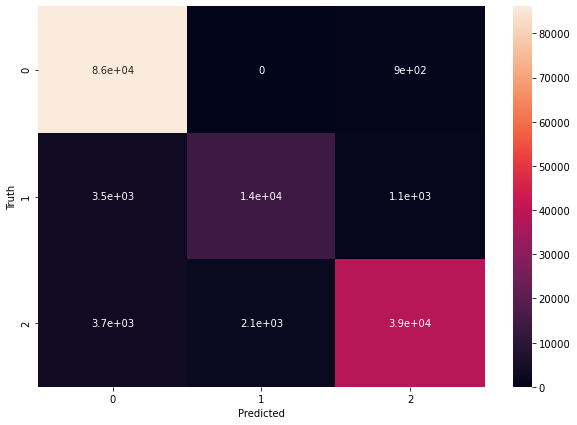

In [66]:
plt.figure(figsize = (10,7))
sb.heatmap(M, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
from sklearn.metrics import classification_report

In [94]:
Class_report = classification_report(y_test,y_predict)

In [99]:
print(Class_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87025
           1       0.87      0.75      0.81     18431
           2       0.94      0.87      0.90     44544

    accuracy                           0.92    150000
   macro avg       0.91      0.87      0.89    150000
weighted avg       0.92      0.92      0.92    150000



In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [120]:
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

NameError: name 'mean' is not defined

In [121]:
model = GradientBoostingClassifier()
model.fit( X_train, y_train)

C:\Users\amarp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [122]:
y_predict_grad = model.predict(X_test)

In [123]:
M_grad = confusion_matrix(y_test, y_predict_grad)
M_grad

array([[87025,     0,     0],
       [  987, 16728,   716],
       [  353,   462, 43729]], dtype=int64)

In [124]:
accuracy_score(y_test,y_predict_grad)

0.9832133333333334